In [1]:
import os
from TrainInference import data_spilt, ReadH5Pkld, get_loader
from TrainInference import inference_net, data_all, get_roc, inference_radiologist, read_txt_to_list




import torch



from vit_classifier import vit_classifier, apply_lora



device = 'cuda:0'
seed = 325





train_list, inference_list = data_spilt('/raid/candi/xiangcen/patient_level/promise_patient_level', 462, seed)

print(len(inference_list))

inference_transform = ReadH5Pkld()

inference_loader = get_loader(inference_list, inference_transform, batch_size=1, shuffle=False, drop_last=False)



def get_noncspc(num=5):
    cspc_list = read_txt_to_list('/home/xiangcen/PatientBiopsyDetect/PROMIS_325_train_gleason/cspca_5.txt')
    non_cspc_list = read_txt_to_list('/home/xiangcen/PatientBiopsyDetect/PROMIS_325_train_gleason/non_cspca_0.txt')

    cspc_loader = get_loader(cspc_list, inference_transform, batch_size=num, shuffle=True, drop_last=False)
    non_cspc_loader = get_loader(non_cspc_list, inference_transform, batch_size=num, shuffle=True, drop_last=False)
    
    
    cspc_img = next(iter(cspc_loader))['img']
    non_cspc_img = next(iter(non_cspc_loader))['img']
    
    return non_cspc_img, cspc_img
        
        
    

non_cspc_img, cspc_img = get_noncspc()
print(non_cspc_img.shape, cspc_img.shape)

model = vit_classifier(6)

model.load_state_dict(torch.load('/home/xiangcen/PatientBiopsyDetect/models/model_weights_base.pth', map_location=device))



tpr, tnr, auroc = get_roc(
    model,
    inference_loader,
    device=device,
    steps = 19,
    mode='zero-shot',
    cspc_img = cspc_img,
    non_cspc_img=non_cspc_img
)
tpr_r, tnr_r, auroc_r= inference_radiologist(inference_loader)

/home/xiangcen/Software/miniconda3/envs/llm/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100
torch.Size([5, 3, 128, 128, 64]) torch.Size([5, 3, 128, 128, 64])
tensor([0.5272, 0.4728])
tensor([0.4830, 0.5170])
tensor([0.4883, 0.5117])
tensor([0.5009, 0.4991])
tensor([0.5011, 0.4989])
tensor([0.4887, 0.5113])
tensor([0.4777, 0.5223])
tensor([0.5100, 0.4900])
tensor([0.4763, 0.5237])
tensor([0.4830, 0.5170])
tensor([0.4790, 0.5210])
tensor([0.5014, 0.4986])
tensor([0.4834, 0.5166])
tensor([0.5000, 0.5000])
tensor([0.4876, 0.5124])
tensor([0.5106, 0.4894])
tensor([0.4932, 0.5068])
tensor([0.5046, 0.4954])
tensor([0.4799, 0.5201])
tensor([0.5144, 0.4856])
tensor([0.5183, 0.4817])
tensor([0.4925, 0.5075])
tensor([0.4911, 0.5089])
tensor([0.5005, 0.4995])
tensor([0.5307, 0.4693])
tensor([0.5111, 0.4889])
tensor([0.4947, 0.5053])
tensor([0.4971, 0.5029])
tensor([0.5010, 0.4990])
tensor([0.4822, 0.5178])
tensor([0.5063, 0.4937])
tensor([0.4724, 0.5276])
tensor([0.4961, 0.5039])
tensor([0.4892, 0.5108])
tensor([0.4796, 0.5204])
tensor([0.5032, 0.4968])
tensor([0.4812, 0.5188])
tenso

In [2]:
tpr_r, tnr_r, auroc_r, tpr, tnr, auroc

(tensor([1.0000, 0.9322, 0.6949, 0.4237, 0.0000]),
 tensor([0.0000, 0.2195, 0.6829, 0.9756, 1.0000]),
 0.7579578757286072,
 tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         0.6102, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000]),
 tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.5854, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000]),
 0.5977675914764404)

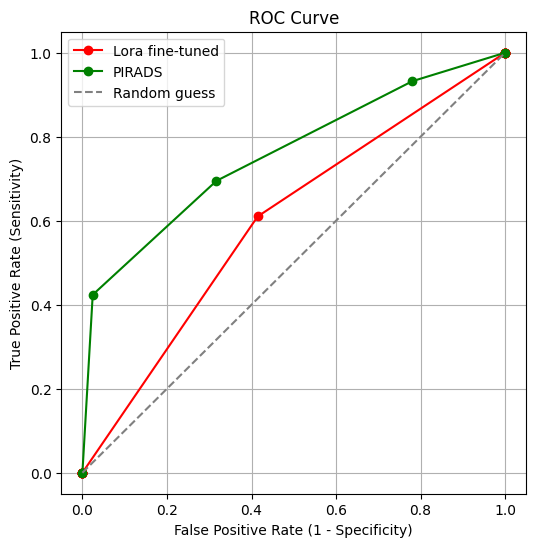

In [3]:
import matplotlib.pyplot as plt
import torch


# plot ROC
plt.figure(figsize=(6,6))
plt.plot(1-tnr, tpr, marker='o', color='red', label="Lora fine-tuned")
plt.plot(1-tnr_r, tpr_r, marker='o', color='green', label="PIRADS")
plt.plot([0,1], [0,1], linestyle='--', color='gray', label="Random guess")

plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)


In [4]:
# import os
# from TrainInference import data_spilt, ReadH5Pkld, get_loader
# from TrainInference import inference_net, data_all, get_roc, inference_radiologist

# inference_list = data_all('/raid/candi/xiangcen/patient_level/promise_patient_level')

# inference_transform = ReadH5Pkld()

# inference_loader = get_loader(inference_list, inference_transform, batch_size=1, shuffle=False, drop_last=False)

# tpr_r, tnr_r = inference_radiologist(inference_loader)